In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

# Рахматуллин Амир

In [9]:
# задание 1 балл (сум 1)
# загрузить данные, индекс - переменная вида дата/время
df = pd.read_csv('crime.csv.zip')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
print(type(df['Unnamed: 0'][0]))
df = df.set_index('Unnamed: 0')
df.iloc[1,0].month

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


AttributeError: 'str' object has no attribute 'month'

In [3]:
# задание 1 балл (сум 2)
# построить сводную таблицу по клоличеству 
# правонарушений (строки - пол (driver_gender), колонки - расса (driver_race))
pd.pivot_table(data = df, index = 'driver_gender', columns = 'driver_race', values = 'state', aggfunc = len)

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,1022,1339,579,75,96096
M,2424,4232,1983,188,165243


In [4]:
# задание 1 балл (сум 3)
# построить сводную таблицу 
# в таблице строки - пол, колонки - расса
# значения проценты в зависимости от рассы и пола внутри 
# рассы (например, белые мужчины 0.8, белые женщины 0.2)
# сумарно по колонке должно получаться 1
pd.pivot_table(df, index = 'driver_gender', columns = 'driver_race', values = 'id', aggfunc = len, margins = True).div(len(df.id))


driver_race,Asian,Black,Hispanic,Other,White,All
driver_gender,,,,,,
F,0.003741,0.004902,0.002119,0.000275,0.351767,0.362803
M,0.008873,0.015492,0.007259,0.000688,0.604885,0.637197
All,0.012614,0.020393,0.009378,0.000963,0.956651,1.000000


In [5]:
# задание 1 балл (сум 4)
# результат предидущей таблицы визуализировать на столбцовом графике с высотой столбца 1 для каждой рассы и 
# разделением внутри по полу (внимание! подписи на графике)
# seaborn так просто это делать не умеет используйте matplotlib


In [6]:
# задание 1 балла (сум 5)
# какое кодичество правонарушений  по видам нарушений (violation) 
# зафиксированны для мужчин и женщин (driver_gender)
# обязательно посчитать суммы по строкам/столбцам
# в таблице не должны быть np.nan (только числа)
# все оформить в виде одной сводной таблицы
pd.pivot_table(df, index = 'driver_gender', columns = 'violation', fill_value=0, margins = True,
               values = 'state', aggfunc = len)

violation,DUI,Equipment,Moving violation,Other,Other (non-mapped),All
driver_gender,,,,,,
F,198,18755,76717,3441,0,99111
M,513,31845,135383,6327,2,174070
All,711,50600,212100,9768,2,273181


In [7]:
# задание 1 балл (сум 6)
# зависит ли количество правонарушений в среднем от дня недели (рабочий Пн-Пт или выходной Сб-Вс)
# визуализировать результат
# когда больше всего нарушений?
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday = []
week = []
work = []
for i in df.index:
    weekday.append(days[i.weekday()])
    week.append(i.weekday())
    if (i.weekday()>=5):
        work.append('no')
    else:
        work.append('yes')
df['work'] = work
df['weekday'] = weekday
df['week'] = week

df.groupby('work')['state'].count()


work
no      72595
yes    200586
Name: state, dtype: int64

Неадекватный водитель (Driving under the influence (DUI))
отсюда и ниже работам только с водителями под воздействием веществ (4 балла)

Отобрать водителей DUI
Проанализировать количество нарушений в среднем в зависимости от дня недели (визуализировать)
Разделить выборку на части исходя из среднего количества нарушений (пояснить выбор).
Для выделенных частей проанализировать среднее количество правонарушений по часам суток, есль ли разница (если есть то в чем).
Внимание! На каждой оси X должны стоять не абстрактные числа, а например часы или дни недели.

In [8]:
# задание 1 балл (сум 7)
# Отобрать водителей DUI
dui = df[df.violation == 'DUI']
dui

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,work,weekday,week
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2010-07-04 01:38:00,VT-2010-00910,VT,Waterbury,Washington County,50023.0,VT RT 18,ST JOHNSBURY VSP,M,29.0,29.0,...,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08,no,Sunday,6
2010-07-04 15:50:00,VT-2010-01035,VT,Sherburne,Chittenden County,50007.0,VT RT 103,RUTLAND VSP,F,27.0,27.0,...,False,No Search Conducted,NaN,False,Citation,False,-2.980731e+08,no,Sunday,6
2010-07-05 23:40:00,VT-2010-01535,VT,Guildhall,Essex County,50009.0,2000 I 91 N; MM2 I 91 N,BRATTLEBORO VSP,F,25.0,25.0,...,False,No Search Conducted,NaN,False,Citation,False,3.644600e+08,yes,Monday,0
2010-07-07 14:00:00,VT-2010-01722,VT,Waterford,Caledonia County,50005.0,MAD BROOK RD,ST JOHNSBURY VSP,M,41.0,41.0,...,False,No Search Conducted,NaN,False,Written Warning,False,5.863135e+08,yes,Wednesday,2
2010-07-10 21:35:00,VT-2010-02178,VT,East Montpelier,Washington County,50023.0,VT RT 14 N,MIDDLESEX VSP,M,50.0,50.0,...,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09,no,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-20 23:35:00,VT-2015-41728,VT,Putney,Windham County,50025.0,I 91 S MM21,BRATTLEBORO VSP,M,38.0,38.0,...,False,No Search Conducted,NaN,False,Written Warning,False,3.644600e+08,yes,Friday,4
2015-11-22 00:02:00,VT-2015-41834,VT,Lyndonville,Caledonia County,50005.0,Lily Pond Rd,ST JOHNSBURY VSP,M,44.0,44.0,...,False,No Search Conducted,NaN,False,Citation,False,2.733421e+08,no,Sunday,6
2015-11-30 20:16:00,VT-2015-43322,VT,Lyndon,Caledonia County,50005.0,I91 MM 137 NB,ST JOHNSBURY VSP,M,19.0,19.0,...,False,No Search Conducted,NaN,False,Arrest for Violation,True,-9.697686e+08,yes,Monday,0


weekday
Friday       140
Monday        66
Saturday     181
Sunday       128
Thursday      65
Tuesday       58
Wednesday     73
Name: weekday, dtype: int64

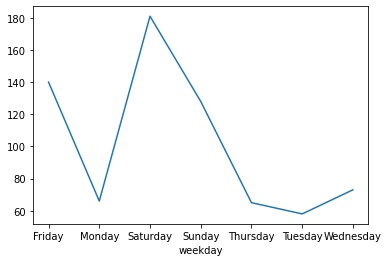

In [18]:
# задание 1 балл (сум 8)
# Проанализировать количество нарушений в среднем в зависимости от дня недели (визуализировать)

display(dui.groupby('weekday')['weekday'].count())
dui.sort_values(by = ['week']).groupby('weekday')['weekday'].count().plot();

In [11]:
# задание 1 балл (сум 9)
# Разделить выборку на части исходя из среднего количества нарушений (пояснить выбор)


,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,work,weekday,week
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2010-07-04 01:38:00,VT-2010-00910,VT,Waterbury,Washington County,50023.0,VT RT 18,ST JOHNSBURY VSP,M,29.0,29.0,...,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08,no,Sunday,6
2010-07-04 15:50:00,VT-2010-01035,VT,Sherburne,Chittenden County,50007.0,VT RT 103,RUTLAND VSP,F,27.0,27.0,...,False,No Search Conducted,NaN,False,Citation,False,-2.980731e+08,no,Sunday,6
2010-07-05 23:40:00,VT-2010-01535,VT,Guildhall,Essex County,50009.0,2000 I 91 N; MM2 I 91 N,BRATTLEBORO VSP,F,25.0,25.0,...,False,No Search Conducted,NaN,False,Citation,False,3.644600e+08,yes,Monday,0
2010-07-07 14:00:00,VT-2010-01722,VT,Waterford,Caledonia County,50005.0,MAD BROOK RD,ST JOHNSBURY VSP,M,41.0,41.0,...,False,No Search Conducted,NaN,False,Written Warning,False,5.863135e+08,yes,Wednesday,2
2010-07-10 21:35:00,VT-2010-02178,VT,East Montpelier,Washington County,50023.0,VT RT 14 N,MIDDLESEX VSP,M,50.0,50.0,...,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09,no,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-20 23:35:00,VT-2015-41728,VT,Putney,Windham County,50025.0,I 91 S MM21,BRATTLEBORO VSP,M,38.0,38.0,...,False,No Search Conducted,NaN,False,Written Warning,False,3.644600e+08,yes,Friday,4
2015-11-22 00:02:00,VT-2015-41834,VT,Lyndonville,Caledonia County,50005.0,Lily Pond Rd,ST JOHNSBURY VSP,M,44.0,44.0,...,False,No Search Conducted,NaN,False,Citation,False,2.733421e+08,no,Sunday,6
2015-11-30 20:16:00,VT-2015-43322,VT,Lyndon,Caledonia County,50005.0,I91 MM 137 NB,ST JOHNSBURY VSP,M,19.0,19.0,...,False,No Search Conducted,NaN,False,Arrest for Violation,True,-9.697686e+08,yes,Monday,0


In [ ]:
dui

In [ ]:
# задание 1 балл (сум 10)
# Для выделенных частей проанализировать среднее количество правонарушений 
# по часам суток, есль ли разница (если есть то в чем).
